# Amadeus Data Challenge

## Lorenzo von Ritter

### Exercise 3

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
%matplotlib inline

#### Import data

In [59]:
time reader = pd.read_csv("../searches.csv", sep="^", parse_dates=[0,11], nrows=100000, dtype={'TxnCode': object, 'OfficeID': object, 'Country': object, 'Origin': object, 'Destination': object, 'RoundTrip': np.int8, 'NbSegments': np.int8,  'Seg1Departure': object,  'Seg1Arrival': object,})

CPU times: user 7.14 s, sys: 204 ms, total: 7.34 s
Wall time: 7.32 s


In [63]:
time searches = pd.read_csv("../searches.csv", sep="^", parse_dates=[0], nrows=100000, usecols=['Date','Origin','Destination'])

CPU times: user 267 ms, sys: 20.3 ms, total: 288 ms
Wall time: 274 ms


In [64]:
searches.dtypes

Date           datetime64[ns]
Origin                 object
Destination            object
dtype: object

In [44]:
time reader = pd.read_csv("../searches.csv", sep="^", parse_dates=[0], iterator=True, chunksize=10000)

CPU times: user 23.2 ms, sys: 3.98 ms, total: 27.2 ms
Wall time: 27.1 ms


In [ ]:
low_memory=false

In [ ]:
time searches = pd.concat(list(reader), ignore_index=True)

/usr/lib/python2.7/dist-packages/pandas/io/parsers.py:1070: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)
/usr/lib/python2.7/dist-packages/pandas/io/parsers.py:1070: DtypeWarning: Columns (40,41,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


#### Search with one airport

In [54]:
special_searches = searches[(searches["Destination"] == "AGP")]

In [55]:
datecount = special_searches.groupby(['Date']).Date.count()
monthcount = datecount.resample('M', how=sum)
monthcount

Date
2013-01-31    169
2013-02-28    147
2013-03-31    187
2013-04-30     31
Freq: M, dtype: int64

#### Now with all three airports

In [65]:
special_searches = searches[(searches["Destination"] == "AGP") | (searches["Destination"] == "BCN") | (searches["Destination"] == "MAD")]

In [66]:
datecount = special_searches.groupby(['Date','Destination']).Date.count()
datecount = datecount.unstack('Destination')
monthcount = datecount.resample('M', how=sum)
monthcount


Destination,AGP,BCN,MAD
Date,,,
2013-01-31,169,517,425
2013-02-28,147,497,400
2013-03-31,187,536,433
2013-04-30,31,174,147


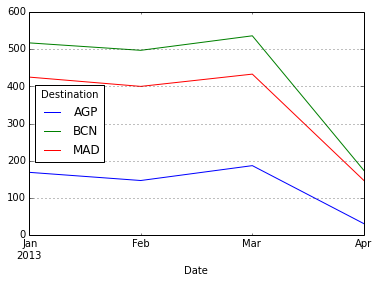

In [67]:
monthcount.plot()